In [ ]:
import pandas as pd
import plotly.express as px

In [ ]:
df = pd.read_csv('tims_dataset_fatalities.csv')
df = df.drop(['2012','2013','2019','2020','2021'],axis=1)
df[['2014','2015','2016','2017','2018']]=df[['2014','2015','2016','2017','2018']].apply(lambda x: x.str.replace(',', ''))
convert_dict = {'2014': float,
                '2015': float,
                '2016': float,
                '2017': float,
                '2018': float
                }
df[['2014','2015','2016','2017','2018']]=df[['2014','2015','2016','2017','2018']].astype(convert_dict)

In [ ]:
df[(df['2014']==0)] # 85 
df[(df['2015']==0)]# 78 
df[(df['2016']==0)] # 70
df[(df['2017']==0)] # 61
df[(df['2018']==0)] # 68


# df['Average']=df[['2014','2015','2016','2017','2018']].astype(convert_dict).mean(axis=1)

In [ ]:
df_yr_avg = df[['2014','2015','2016','2017','2018']].astype(convert_dict).mean(axis=0)
df_yr_avg = df_yr_avg.reset_index().rename(columns={'index':'Year',0:'Average'})
fig = px.line(df_yr_avg, x="Year", y="Average",
     labels={
             "Year": "Year",
             "Average": "Average collisions per year",
         },template='plotly_dark')
fig.show()

In [ ]:
df_filtered = df[(df['2014']>0) & (df['2015']>0) & (df['2016']>0) & (df['2017']>0) & (df['2018']>0)].reset_index(drop=True)

In [ ]:
top_10_df = df_filtered.sort_values(by=['Average'],ascending=False).iloc[1:,:].head(10)

In [ ]:
fig = px.bar(top_10_df, x='City', y='Average',template='plotly_dark',
         labels={
             "City": "City",
             "Average": "Average collisions per year",
         })
fig.show()

In [ ]:
df_filtered

In [13]:
from pyrosm import OSM
import pyrosm
import pandas as pd
import importlib
importlib.reload(pyrosm)
from pyrosm import OSM
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## [OSM Data for San Francisco](https://download.bbbike.org/osm/bbbike/SanFrancisco/)

<AxesSubplot: >

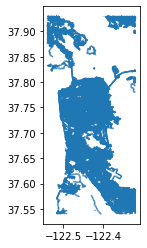

In [14]:
# fp = get_data("sanfrancisco", directory="/Users/abajaj/Downloads/capstone")
# pyrosm.pyrosm.OSM(filepath, bounding_box=None)
osm = OSM(filepath='/Users/abajaj/Downloads/capstone/SanFrancisco.osm.pbf')
drive_net = osm.get_network(network_type="driving")
drive_net.plot()

In [5]:
drive_net.columns

Index(['access', 'area', 'bicycle', 'bridge', 'busway', 'cycleway', 'foot', 'highway', 'junction', 'lanes', 'lit', 'maxspeed', 'motorcar', 'motor_vehicle', 'name', 'oneway', 'overtaking', 'psv', 'ref', 'service', 'sidewalk', 'smoothness', 'surface', 'tracktype', 'tunnel', 'turn', 'width', 'id', 'timestamp', 'version', 'tags', 'osm_type', 'geometry', 'length'], dtype='object')

In [15]:
drive_net.head(100)

,access,area,bicycle,bridge,busway,cycleway,foot,highway,junction,lanes,lit,maxspeed,motorcar,motor_vehicle,name,oneway,overtaking,psv,ref,service,sidewalk,smoothness,surface,tracktype,tunnel,turn,width,id,timestamp,version,tags,osm_type,geometry,length
0,None,None,no,None,None,None,None,motorway,None,4,None,65 mph,None,None,Bayshore Freeway,yes,None,None,US 101,None,None,None,None,None,None,None,None,4311275,0,-1,"{""NHS"":""STRAHNET"",""hgv"":""designated"",""hgv:nati...",way,"MULTILINESTRING ((-122.40673 37.65521, -122.40...",328.0
1,None,None,no,yes,None,None,None,motorway,None,4,None,65 mph,None,None,Bayshore Freeway,yes,None,None,US 101,None,None,None,None,None,None,None,None,4970206,0,-1,"{""NHS"":""STRAHNET"",""hgv"":""designated"",""hgv:nati...",way,"MULTILINESTRING ((-122.40696 37.65523, -122.40...",259.0
2,None,None,None,None,None,None,None,residential,None,None,None,None,None,None,Macondray Lane,None,None,None,None,None,None,None,None,None,None,None,None,5004035,0,-1,None,way,"MULTILINESTRING ((-122.41648 37.79905, -122.41...",75.0
3,None,None,no,yes,None,None,None,motorway,None,4,None,65 mph,None,None,Bayshore Freeway,yes,None,None,US 101,None,None,None,None,None,None,None,None,5071579,0,-1,"{""NHS"":""STRAHNET"",""hgv"":""designated"",""hgv:nati...",way,"MULTILINESTRING ((-122.40691 37.65317, -122.40...",227.0
4,None,None,no,None,None,None,None,motorway,None,5,None,55 mph,None,None,James Lick Freeway,yes,None,None,US 101,None,None,None,concrete,None,None,None,None,5071582,0,-1,"{""NHS"":""STRAHNET"",""hgv"":""designated"",""hgv:nati...",way,"MULTILINESTRING ((-122.39889 37.71689, -122.39...",234.0
5,None,None,None,None,None,None,None,residential,None,None,None,None,None,None,6th Street,None,None,None,None,None,None,None,asphalt,None,None,None,None,7373728,0,-1,None,way,"MULTILINESTRING ((-122.40016 37.77429, -122.40...",102.0
6,None,None,None,None,None,None,None,residential,None,None,None,None,None,None,Bluxome Street,None,None,None,None,None,None,None,asphalt,None,None,None,None,7373736,0,-1,"{""name:etymology:wikidata"":""Q107178240""}",way,"MULTILINESTRING ((-122.40016 37.77429, -122.39...",536.0
7,None,None,None,None,None,None,None,residential,None,None,None,None,None,None,Nelson Rising Lane,None,None,None,None,None,None,None,None,None,None,None,None,7448875,0,-1,"{""name:etymology:wikidata"":""Q16105754""}",way,"MULTILINESTRING ((-122.39110 37.76967, -122.39...",147.0
8,None,None,None,None,None,None,None,residential,None,None,None,None,None,None,Clarence St,None,None,None,None,None,no,None,asphalt,None,None,None,None,7852692,0,-1,"{""tiger:cfcc"":""A41"",""tiger:county"":""Contra Cos...",way,"MULTILINESTRING ((-122.39260 37.92775, -122.39...",42.0
9,None,None,None,None,None,None,None,residential,None,None,None,None,None,None,Sanderling Island,None,None,None,None,None,None,None,None,None,None,None,None,7853051,0,-1,"{""tiger:cfcc"":""A41"",""tiger:county"":""Contra Cos...",way,"MULTILINESTRING ((-122.38102 37.90970, -122.38...",73.0


In [39]:
# str(drive_net.geometry[0])

In [28]:
type(drive_net.geometry[0])

shapely.geometry.multilinestring.MultiLineString

In [8]:
drive_net[drive_net['name']=='El Camino Real'].reset_index(drop=True)['tags'][8]

'{"hgv":"designated","hgv:national_network":"terminal_access","lanes:backward":"3","lanes:forward":"2","old_ref":"US 101","source:hgv:national_network":"Caltrans http://www.dot.ca.gov/hq/traffops/trucks/truckmap/","tiger:cfcc":"A31","tiger:county":"San Mateo, CA","tiger:name_base":"el Camino Real","tiger:name_base_1":"State Highway 82","tiger:name_direction_prefix":"S","turn:lanes:backward":"left||"}'

In [9]:
osm.conf.tags.available

['aerialway',
 'aeroway',
 'amenity',
 'boundary',
 'building',
 'craft',
 'emergency',
 'geological',
 'highway',
 'historic',
 'landuse',
 'leisure',
 'natural',
 'office',
 'power',
 'public_transport',
 'railway',
 'route',
 'place',
 'shop',
 'tourism',
 'waterway']

In [61]:
routes = ["bus", "ferry", "railway", "subway", "train", "tram", "trolleybus"]
rails = ["tramway", "light_rail", "rail", "subway", "tram"]
# highway	traffic_signals
bus = ['yes']
transit = osm.get_data_by_custom_criteria(custom_filter={
                                        'highway': ['*'],
#                                         'traffic_sign':['*'],
                                        'public_transport': True,},
                                        # Keep data matching the criteria above
                                        filter_type="keep",
                                        # Do not keep nodes (point data)    
                                        keep_nodes=False, 
                                        keep_ways=True, 
                                        keep_relations=True)

In [67]:
osm.conf.tags.available

['aerialway',
 'aeroway',
 'amenity',
 'boundary',
 'building',
 'craft',
 'emergency',
 'geological',
 'highway',
 'historic',
 'landuse',
 'leisure',
 'natural',
 'office',
 'power',
 'public_transport',
 'railway',
 'route',
 'place',
 'shop',
 'tourism',
 'waterway']

In [109]:
osm.conf.tags.route

['bicycle',
 'bus',
 'canoe',
 'detour',
 'duration',
 'evacuation',
 'ferry',
 'foot',
 'from',
 'hiking',
 'horse',
 'inline_skates',
 'light_rail',
 'mtb',
 'network',
 'piste',
 'railway',
 'road',
 'route',
 'running',
 'ski',
 'subway',
 'to',
 'train',
 'tracks',
 'tram',
 'trolleybus',
 'type']

In [173]:
highways = osm.get_data_by_custom_criteria(custom_filter={'highway':True},
                    # Keep data matching the criteria above
                    filter_type="keep",
                    # Do not keep nodes (point data)    
                    keep_nodes=False, 
                    keep_ways=True, 
                    keep_relations=False)

In [176]:
# highways.head()
highways.size

2919633

In [171]:
# highways.name.value_counts()
dir(highways[highways['name']=='El Camino Real'].reset_index(drop=True).geometry[5])

['__and__',
 '__array_interface__',
 '__bool__',
 '__class__',
 '__del__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__geo_interface__',
 '__geom__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__p__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__weakref__',
 '__xor__',
 '_array_interface_base',
 '_crs',
 '_ctypes',
 '_ctypes_data',
 '_empty',
 '_geom',
 '_get_coords',
 '_is_empty',
 '_lgeos',
 '_ndim',
 '_other_owned',
 '_repr_svg_',
 '_set_coords',
 '_set_geom',
 'almost_equals',
 'area',
 'array_interface_base',
 'boundary',
 'bounds',
 'buffer',
 'centroid',
 'contains',
 'convex_hull',
 'coords',
 'covered_by',
 'covers',
 'crosses',
 'ctypes',
 'difference',
 'disjoint',


In [172]:
highways[highways['name']=='El Camino Real'].reset_index(drop=True).geometry[5].bounds
# tuples[1],tuples[0]
# tuples[3],tuples[2]
# highways[highways['name']=='El Camino Real'].reset_index(drop=True).geometry.apply(lambda x: x.length).describe()

(-122.3830068, 37.5931966, -122.3811665, 37.5947334)

In [106]:
public_transit = osm.get_data_by_custom_criteria(custom_filter={'public_transport':True},
                    # Keep data matching the criteria above
                    filter_type="keep",
                    # Do not keep nodes (point data)    
                    keep_nodes=False, 
                    keep_ways=True, 
                    keep_relations=False)

In [177]:
public_transit.head()
public_transit.size

7112